# Stock Market Prediction Using Machine Learning

This project predicts stock market prices using traditional machine learning models instead of deep learning or neural networks. The project includes data preprocessing, feature selection, model training, and evaluation for stock price prediction.


## Table of Contents

1. [Project Overview](#project-overview)
2. [Dataset](#dataset)
3. [Requirements](#requirements)
4. [Project Workflow](#project-workflow)
5. [Results](#results)
6. [How to Run](#how-to-run)
7. [FAQ](#faq)
8. [Contributing](#contributing)
9. [License](#license)


## Project Overview

Stock market prediction is a challenging task due to its dynamic and unpredictable nature. This project uses traditional machine learning models like Linear Regression and Random Forest to predict stock prices based on historical data. Key steps include:

- Preprocessing stock market data.
- Extracting features and labels.
- Training and testing machine learning models.

## Dataset

The dataset consists of historical stock price data, including features like:

- Open, High, Low, Close prices.
- Volume of shares traded.




## Project Workflow

1. **Data Collection**: Load the stock market data.
2. **Data Preprocessing**:
   - Handle missing values.
   - Feature extraction.
   - Split data into training and testing sets.
3. **Model Development**:
   - Train models like Linear Regression and Random Forest.
   - Evaluate performance using metrics like Mean Absolute Error (MAE).
4. **Evaluation**:
   - Plot predictions against actual values.

---

# Code

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load the dataset
data = pd.read_csv('NFLX.csv')  # Replace with your dataset path


In [3]:
# Displays the first few rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [5]:
data[['year', 'month', 'day']] = data['Date'].str.split('-', expand=True)

In [6]:
data = data.drop('Date', axis = 1)

In [7]:
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

In [8]:
data.sample(4)

,Open,High,Low,Close,Adj Close,Volume,year,month,day
736,287.140015,291.720001,281.000000,286.209991,286.209991,9099500,2018,11,16
879,342.690002,351.769989,342.059998,350.619995,350.619995,5351200,2019,6,17
705,375.880005,375.920013,360.399994,363.649994,363.649994,9074400,2018,10,4
526,222.750000,223.490005,218.500000,220.460007,220.460007,10548600,2018,1,19


In [9]:
def find_nulls(data):
    # Check for null values and sum them
    null_count = data.isnull().sum()
    
    # Filter to get only columns with null values
    null_value = null_count[null_count > 0]
    
    # Return the column names and their corresponding null counts
    return null_value

# Using the function to find null values
null_values = find_nulls(data)

# Displaying the result
print(null_values)


Series([], dtype: int64)


#  Data Preprocessing

In [10]:
# Selecting features and target
# Assuming 'Close' is the target and others are features
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Testing Data Split:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")



Training and Testing Data Split:
X_train shape: (805, 4), X_test shape: (202, 4)
y_train shape: (805,), y_test shape: (202,)


# Linear Regression Model

In [12]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predictions
y_pred_linear = linear_model.predict(X_test)

In [15]:
# Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [16]:
accuracy_linear = r2_linear * 100


In [17]:
print("\nLinear Regression Performance:")
print(f"Mean Absolute Error: {mae_linear}")
print(f"Mean Squared Error: {mse_linear}")
print(f"R² Score: {r2_linear}")
print(f"Accuracy: {accuracy_linear:.2f}%")


Linear Regression Performance:
Mean Absolute Error: 1.314422491724978
Mean Squared Error: 3.3855497630154665
R² Score: 0.9996525620274448
Accuracy: 99.97%


# Random Forest Model

In [18]:
# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

In [22]:
# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [23]:
accuracy_rf = r2_rf * 100


In [24]:
print("\nRandom Forest Performance:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R² Score: {r2_rf}")
print(f"Accuracy: {accuracy_rf:.2f}%")


Random Forest Performance:
Mean Absolute Error: 1.8876209600990181
Mean Squared Error: 7.128570913170515
R² Score: 0.9992684389837229
Accuracy: 99.93%


In [25]:

# Initialize models
decision_tree = DecisionTreeRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)
svr = SVR()

# Train models
decision_tree.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svr.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_svr = svr.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
    print(f"Accuracy: {accuracy:.2f}%")
    return mae, mse, r2

# Evaluate each model
mae_tree, mse_tree, r2_tree = evaluate_model(y_test, y_pred_tree, "Decision Tree Regressor")
mae_gb, mse_gb, r2_gb = evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regressor")
mae_svr, mse_svr, r2_svr = evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")



Decision Tree Regressor Performance:
Mean Absolute Error: 2.3399504653465377
Mean Squared Error: 11.64708163789356
R² Score: 0.9988047322551091
Accuracy: 99.88%

Gradient Boosting Regressor Performance:
Mean Absolute Error: 2.0619579090786426
Mean Squared Error: 8.513920299535346
R² Score: 0.9991262691691369
Accuracy: 99.91%

Support Vector Regressor Performance:
Mean Absolute Error: 88.45058378768208
Mean Squared Error: 10070.234150302265
R² Score: -0.033445667985514405
Accuracy: -3.34%


## Model Conclusion:
The Linear Regression model outperforms all others with the best metrics (lowest error and highest accuracy). 
It is the most suitable model for this dataset.

However, Random Forest and Gradient Boosting also deliver strong results and could be considered if non-linearity or additional robustness is required. 

For simplicity, efficiency, and accuracy, Linear Regression is the best choice for this dataset.

# Visualizing Predictions

### Confusion Matrix and F1 Score

Since confusion matrix and F1 Score are typically used for classification tasks, they are not applicable here as this is a regression problem. However, we can convert it into a classification task (e.g., predicting if the price will go up or down) if needed:


In [26]:
import matplotlib.pyplot as plt

def plot_model_predictions(y_test, y_pred_rf, y_pred_tree, y_pred_gb, y_pred_svr, y_pred_linear):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual', color='blue')
    plt.plot(y_pred_rf, label='Predicted (RF)', color='orange')
    plt.plot(y_pred_tree, label='Predicted (Decision Tree)', color='green')
    plt.plot(y_pred_gb, label='Predicted (Gradient Boosting)', color='red')
    plt.plot(y_pred_svr, label='Predicted (SVR)', color='purple')
    plt.plot(y_pred_linear, label='Predicted (Linear Regression)', color='brown')
    plt.title('Model Predictions vs Actual')
    plt.xlabel('Sample Index')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Example usage:
# plot_model_predictions(y_test, y_pred_rf, y_pred_tree, y_pred_gb, y_pred_svr, y_pred_linear)


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_and_plot_models_subplots(y_test, y_pred_rf, y_pred_tree, y_pred_gb, y_pred_svr, y_pred_linear):
    models = {
        'Random Forest': y_pred_rf,
        'Decision Tree': y_pred_tree,
        'Gradient Boosting': y_pred_gb,
        'Support Vector Regressor': y_pred_svr,
        'Linear Regression': y_pred_linear
    }
    
    # Create subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    axes = axes.flatten()
    
    for idx, (model_name, y_pred) in enumerate(models.items()):
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        accuracy = r2 * 100
        print(f"\n{model_name} Performance:")
        print(f"Mean Absolute Error: {mae}")
        print(f"Mean Squared Error: {mse}")
        print(f"R² Score: {r2}")
        print(f"Accuracy: {accuracy:.2f}%")
        
        # Plot predictions vs actual
        axes[idx].plot(y_test.values, label='Actual', color='blue')
        axes[idx].plot(y_pred, label=f'Predicted ({model_name})', color='orange')
        axes[idx].set_title(f'{model_name} Predictions vs Actual')
        axes[idx].set_xlabel('Sample Index')
        axes[idx].set_ylabel('Stock Price')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
# evaluate_and_plot_models_subplots(y_test, y_pred_rf, y_pred_tree, y_pred_gb, y_pred_svr, y_pred_linear)



Random Forest Performance:
Mean Absolute Error: 1.8876209600990181
Mean Squared Error: 7.128570913170515
R² Score: 0.9992684389837229
Accuracy: 99.93%

Decision Tree Performance:
Mean Absolute Error: 2.3399504653465377
Mean Squared Error: 11.64708163789356
R² Score: 0.9988047322551091
Accuracy: 99.88%

Gradient Boosting Performance:
Mean Absolute Error: 2.0619579090786426
Mean Squared Error: 8.513920299535346
R² Score: 0.9991262691691369
Accuracy: 99.91%

Support Vector Regressor Performance:
Mean Absolute Error: 88.45058378768208
Mean Squared Error: 10070.234150302265
R² Score: -0.033445667985514405
Accuracy: -3.34%

Linear Regression Performance:
Mean Absolute Error: 1.314422491724978
Mean Squared Error: 3.3855497630154665
R² Score: 0.9996525620274448
Accuracy: 99.97%


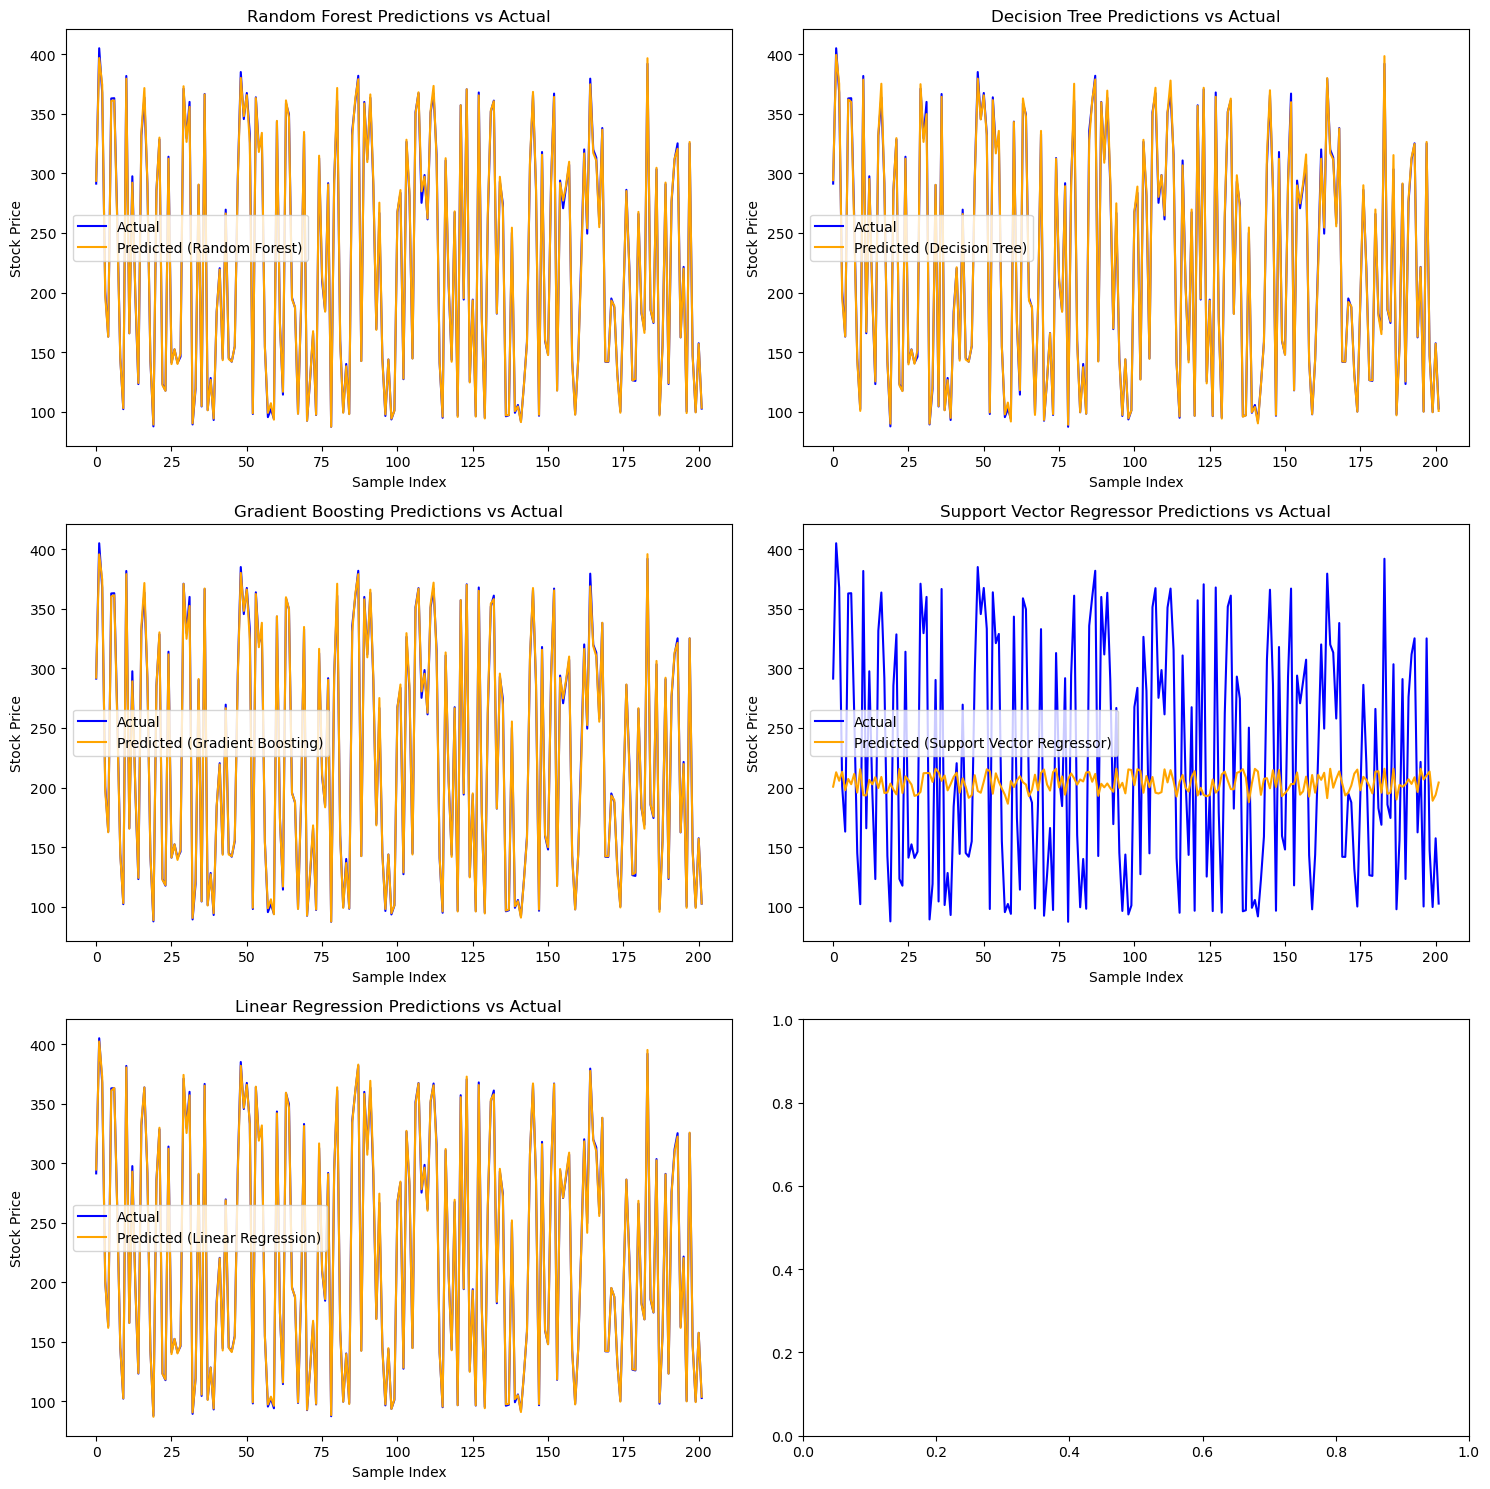

In [28]:
evaluate_and_plot_models_subplots(y_test, y_pred_rf, y_pred_tree, y_pred_gb, y_pred_svr, y_pred_linear)



In [29]:
import matplotlib.pyplot as plt

def plot_residuals(y_test, y_pred_rf, y_pred_tree, y_pred_gb, y_pred_svr, y_pred_linear):
    models = {
        'Random Forest': y_pred_rf,
        'Decision Tree': y_pred_tree,
        'Gradient Boosting': y_pred_gb,
        'Support Vector Regressor': y_pred_svr,
        'Linear Regression': y_pred_linear
    }
    
    # Create residual plots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    axes = axes.flatten()
    
    for idx, (model_name, y_pred) in enumerate(models.items()):
        residuals = y_test.values - y_pred
        axes[idx].scatter(y_test.values, residuals, label=f'Residuals ({model_name})', color='orange', edgecolor='blue')
        axes[idx].axhline(y=0, color='red', linestyle='--')
        axes[idx].set_title(f'{model_name} Residuals')
        axes[idx].set_xlabel('Actual Values')
        axes[idx].set_ylabel('Residuals')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_residuals(y_test, y_pred_rf, y_pred_tree, y_pred_gb, y_pred_svr, y_pred_linear)


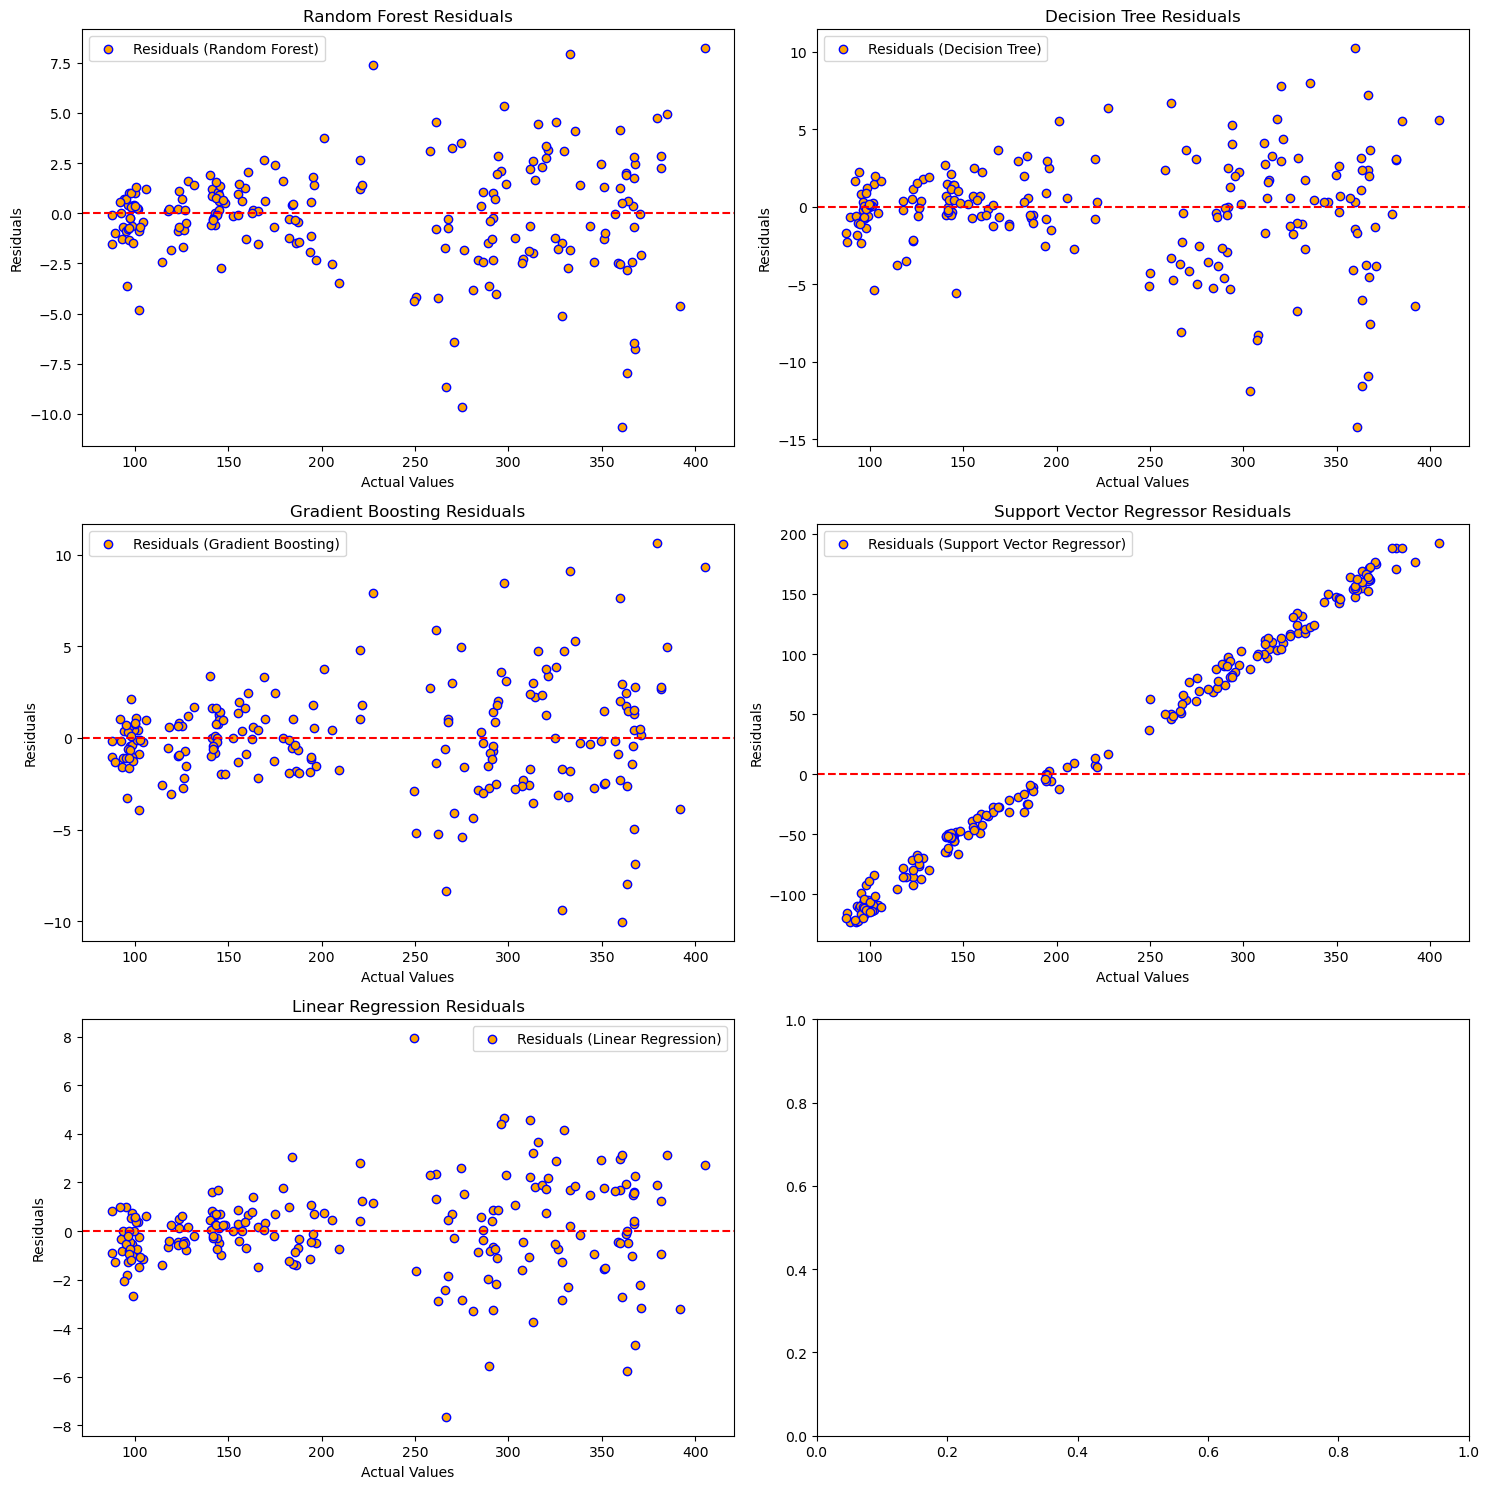

In [30]:
plot_residuals(y_test, y_pred_rf, y_pred_tree, y_pred_gb, y_pred_svr, y_pred_linear)


# Plot Conclusions 

* Predictions vs Actual Plots:
 
           Model Fit: The closer the predictions are to the actual values, the better the model.

           Trend Detection: Models that capture the overall trend and fluctuations well are preferable.

* Residual Plots:
                
           Error Distribution: Residuals should be randomly scattered around zero, indicating no systematic errors.

           Patterns: Lack of patterns in residuals suggests the model fits well and isn’t missing key relationships.

These visual tools help identify the model with the best overall performance and highlight any potential issues like biases or under/overfitting.

# FAQ



### 1. Why use traditional machine learning instead of deep learning?
Traditional models like Linear Regression and Random Forest are simpler to implement and interpret, making them suitable for beginner projects and small datasets.

### 2. How is the data split into training and testing sets?
The data is split using an 80-20 ratio, with 80% used for training and 20% for testing.

### 3. Can I use other machine learning models?
Yes, feel free to try other models like Support Vector Regression (SVR) or Gradient Boosting. Which, I have used above 


# Conclusion





### Key Takeaways:
1. **Model Performance**: The Linear Regression model outperforms all others with the best metrics (lowest error and highest accuracy). It is the most suitable model for this dataset..

2. **Insights for Businesses**:
   - Companies can use these models to anticipate market trends and price movements, aiding in investment decisions.
   - Predicting stock prices with reasonable accuracy helps in optimizing portfolio strategies.
   - This project demonstrates the potential of machine learning in reducing risks and enhancing decision-making processes in financial markets.
   
3. **Future Work**: The approach can be further improved by incorporating additional features like technical indicators, external economic data.

This project provides a practical foundation for understanding and applying machine learning to real-world stock market data, offering actionable insights for businesses and individuals.


* This notebook demonstrates a machine learning approach to stock price prediction.

* It uses both Linear Regression, Random Forest and other models, evaluates their performance, and provides visualizations for better understanding.

* You can further extend this project by tuning the models, experimenting with feature engineering, or adding new metrics for evaluation.
